In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
%system date

['현재 날짜: 2024-12-06 ', '새로운 날짜를 입력하십시오: (년-월-일) ']

In [4]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 287E-F5C0

 c:\workspace\ml04 디렉터리

2024-12-06  오후 03:04    <DIR>          .
2024-12-06  오전 09:12    <DIR>          ..
2024-12-06  오후 03:03    <DIR>          .ipynb_checkpoints
2024-12-06  오후 12:17    <DIR>          datasets
2024-12-06  오후 03:04               877 비지도학습.ipynb
2024-12-06  오후 02:48           575,036 지도학습.ipynb
               2개 파일             575,913 바이트
               4개 디렉터리  33,453,101,056 바이트 남음


In [5]:
%%writefile test.txt
abc
한글
1234
!@#$

Writing test.txt


In [6]:
# %load test.txt
abc
한글
1234
!@#$


In [13]:
import requests
#requests.get('https://bit.ly/fruits_300_data')
res=requests.get('https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy')
with open('fruits_300.npy','wb') as f:
    f.write(res.content)

In [14]:
fruits=np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [20]:
fruits[0].mean(),fruits[0].max(),fruits[0].min()

(88.3346, 241, 1)

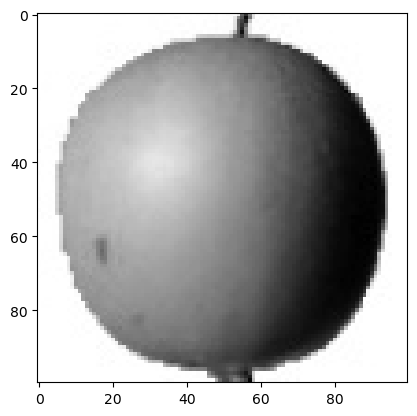

In [23]:
plt.imshow(fruits[0],cmap='binary')

In [24]:
apple=fruits[0:100].reshape(-1,100*100)
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1,100*100)

In [25]:
apple[0]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

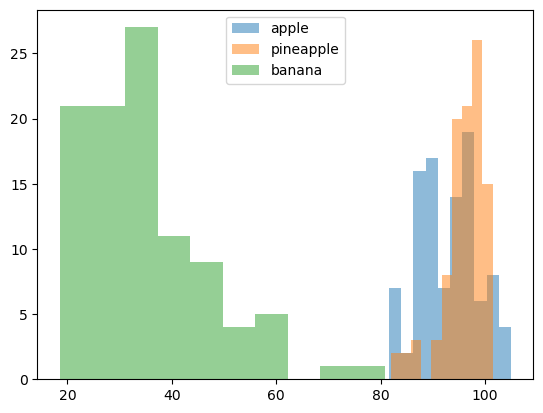

In [28]:
plt.hist(np.mean(apple, axis=1), alpha=0.5)
plt.hist(np.mean(pineapple, axis=1), alpha=0.5)
plt.hist(np.mean(banana, axis=1), alpha=0.5)
plt.legend(['apple','pineapple','banana'])

In [44]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=2024)
model.fit(fruits[:].reshape(-1,100*100))

C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=2024)

In [45]:
print(model.labels_)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [46]:
print(np.unique(model.labels_,return_counts=True))

(array([0, 1, 2]), array([110,  91,  99], dtype=int64))


In [47]:
def draw_fruits(arr, ratio=1):
    n=len(arr)
    rows=int(np.ceil(n/10))
    cols= n if rows<2 else 10
    fig,axs=plt.subplots(rows,cols,figsize=(15,15),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 +j <n:
                axs[i,j].imshow(arr[i*10+j],cmap='binary')
            axs[i,j].axis('off')
    plt.show()            

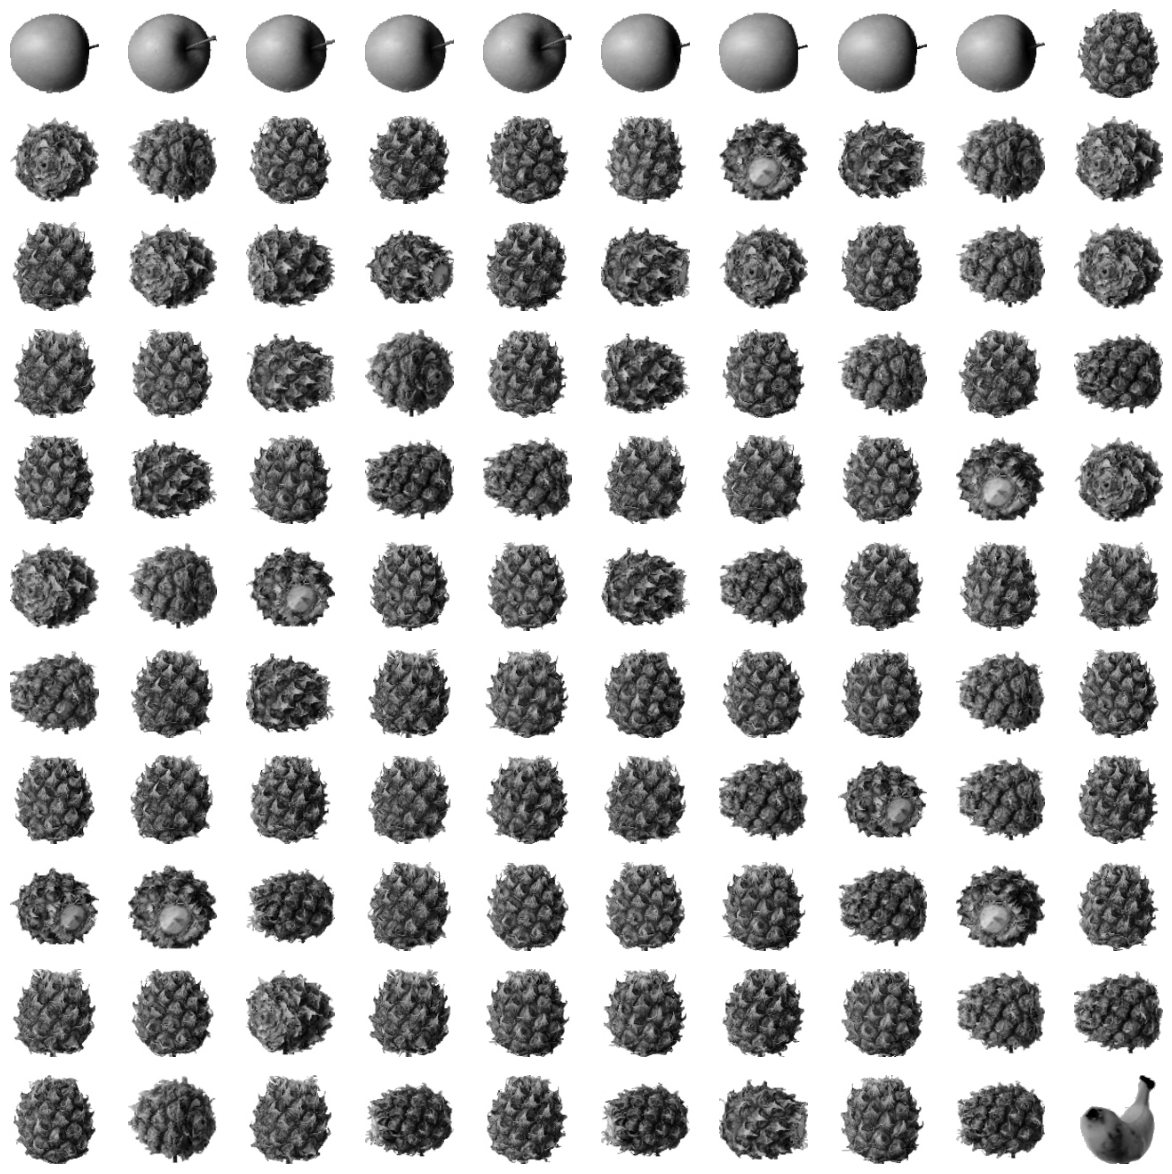

In [48]:
draw_fruits(fruits[model.labels_==0])

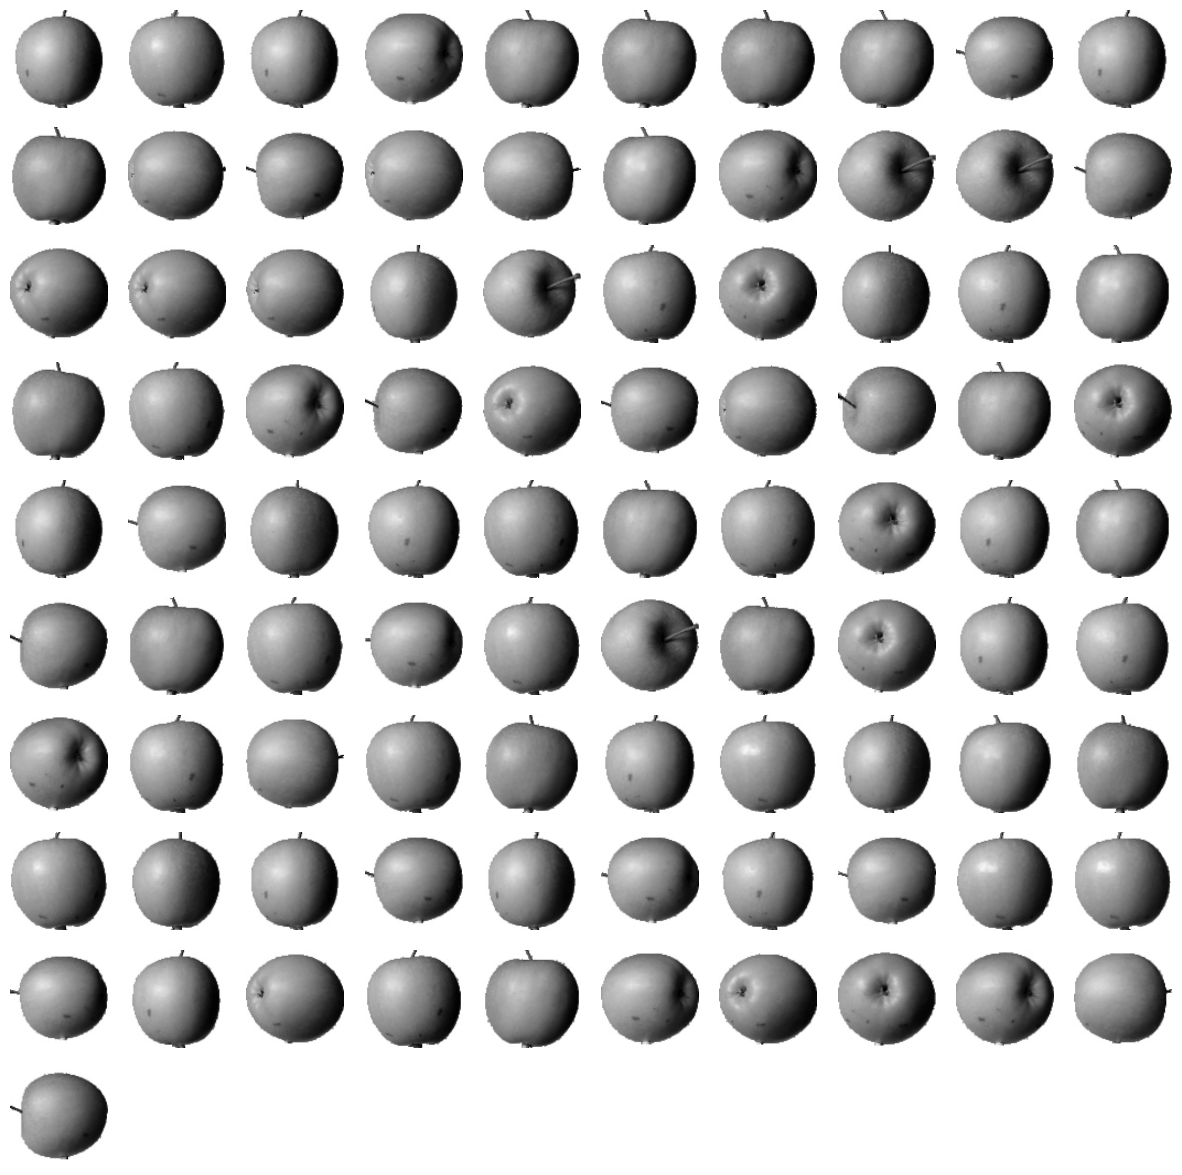

In [49]:
draw_fruits(fruits[model.labels_==1])

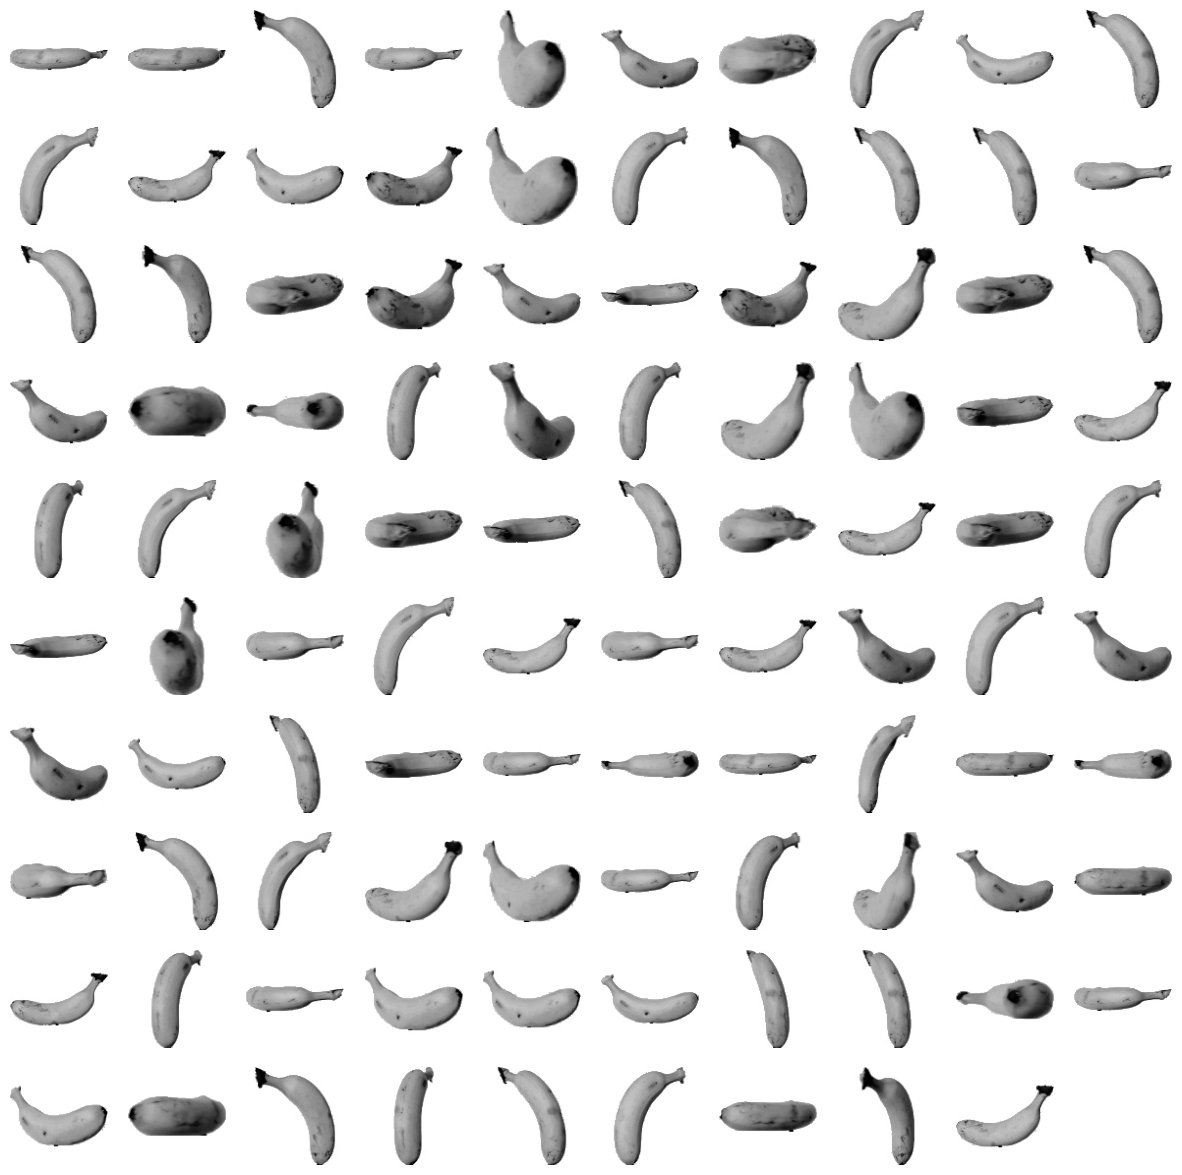

In [50]:
draw_fruits(fruits[model.labels_==2])

C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

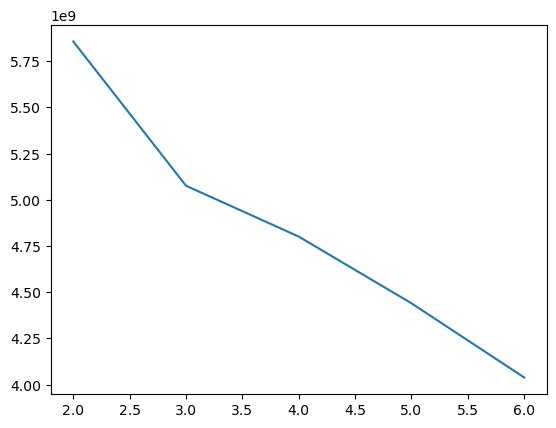

In [43]:
inertia=[]
for k in range(2,7):
    model=KMeans(n_clusters=k, random_state=2024)
    model.fit(fruits[:].reshape(-1,100*100))
    inertia.append(model.inertia_)
plt.plot(range(2,7), inertia)
